# Simulation and Real Data Analysis

## Initialization

In [23]:
import torch
import numpy as np
import sys
sys.path.append("../..")
from utils import notears_nonlinear
from Modules.StaticDAG.NotearsMLP import NotearsMLP
import time


## Simulation Study

In [24]:
import utils as ut
torch.set_default_dtype(torch.double)
np.set_printoptions(precision=3)
ut.set_random_seed(123)

n, d, s0, graph_type, sem_type = 200, 5, 9, 'ER', 'mim'
B_true = ut.simulate_dag(d, s0, graph_type)
np.savetxt('simulation_results/nonlinear/W_true.csv', B_true, delimiter=',')

X = ut.simulate_nonlinear_sem(B_true, n, sem_type)
np.savetxt('simulation_results/nonlinear/X.csv', X, delimiter=',')

model = NotearsMLP(dims=[d, 10, 1], bias=True)
W_est = notears_nonlinear(model, X, lambda1=0.01, lambda2=0.01)
assert ut.is_dag(W_est)
np.savetxt('simulation_results/nonlinear/W_est.csv', W_est, delimiter=',')
acc = ut.count_accuracy(B_true, W_est != 0)
print(acc)


{'fdr': 0.1, 'tpr': 1.0, 'fpr': 1.0, 'shd': 1, 'nnz': 10}


## ADNI Analysis

In [3]:
# Run ADNI_Analysis as this is time consuming
# cd Baselines
# cd Notears


from Modules.LoadData.load_data_ADNI import get_dataloader
import tqdm
torch.set_default_dtype(torch.float)
dataloader = get_dataloader(batch_size = 1)
model = NotearsMLP(dims=[90, 50, 1], bias=True)
start_time = time.time()
for data, id, group in tqdm(dataloader):
    causality = notears_nonlinear(model, data.numpy(), lambda1=0.01, lambda2=0.01)
    out = np.array(causality.cpu())
    folder = "ECNs/" + id[0] + "_" + group[0] + ".npy"
    np.save(folder, out)
end_time = time.time()
print(f"time:{end_time - start_time}seconds")

/home/omnisky/anaconda3/envs/w/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:377: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
/home/omnisky/anaconda3/envs/w/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:377: RuntimeWarning: invalid value encountered in matmul
  eAw = eAw @ eAw


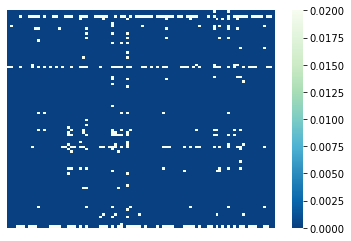

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure()
sns.heatmap(W_est, vmax=0.02, cmap='GnBu_r', xticklabels=False, yticklabels=False)
plt.show()